In [4]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from sklearn.preprocessing import MinMaxScaler
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

## Evaluate Model

In [41]:
# 1. load data
datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/benign/datas-final.pkl')

In [6]:
minMaxScaler = pickle.load(open('../models/{}'.format('minmaxscaler-autoencoder-data-from-bro-0307'), 'rb'))
trainedAutoencoder = load_model('../models/{}'.format('autoencoder-autoencoder-data-from-bro-0307'))

In [42]:
xScaled = minMaxScaler.fit_transform(datas.select_dtypes(include=[np.number]))
X = pd.DataFrame(xScaled)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
X_pred = trainedAutoencoder.predict(X)

In [44]:
DX = (X - X_pred) ** 2

In [45]:
compare_datas = datas.copy()

In [46]:
compare_datas['SUM'] = np.sum(DX, axis=1)

In [47]:
compare_datas['MEAN'] = np.mean(DX, axis=1)

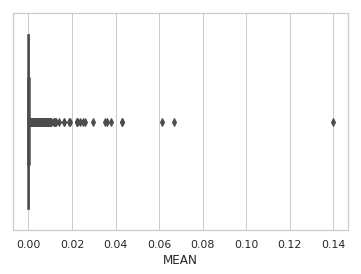

In [48]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=compare_datas['MEAN'])

In [20]:
compare_datas[['src_ip','dst_ip','dst_port','SUM','MEAN'] ]

,src_ip,dst_ip,dst_port,SUM,MEAN
0,147.32.84.180,65.55.196.251,tcp,12.391121,0.442540
1,147.32.84.180,65.55.16.187,tcp,9.782380,0.349371
2,147.32.84.180,65.54.234.75,tcp,4.533663,0.161917
3,147.32.84.180,74.125.224.242,tcp,4.778779,0.170671
4,147.32.84.180,74.125.224.240,tcp,4.795481,0.171267
5,147.32.84.180,74.125.224.243,tcp,4.776793,0.170600
6,147.32.84.180,65.54.186.47,tcp,5.723528,0.204412
7,147.32.84.180,65.54.165.169,tcp,5.430759,0.193956
8,147.32.84.180,206.222.227.2,tcp,3.183318,0.113690
9,147.32.84.180,205.188.101.160,tcp,4.121233,0.147187


In [21]:
my_capture_datas = pd.read_pickle('/home/sdsra/Downloads/Dataset/benign-capture/datas.pkl')

In [22]:
my_capture_datas

,amount_diff_cert,avg_of_cert_length,avg_of_duration,avg_of_public_key,avg_periodicity,dst_ip,dst_port,get_SNI_equal_Dst_IP,inbound_pckts,is_CNs_in_SNA_dns,is_SNIs_in_SNA_dns,is_valid_cert,number_of_cert_path,number_of_domains,number_of_flows,outbound_pckts,percent_of_established_stats,percent_of_stdev_duration,ratio_of_SNI_ssl,ratio_of_cert,ratio_of_self_signed,ratio_of_size,ratio_of_ssl,ratio_of_tls_version,ratio_of_x509_ssl,src_ip,src_port,stdev_duration,stdev_of_cert_length,stdev_periodicity,total_size_of_flows_orig,total_size_of_flows_resp,label
0,0,-1.0,8.604153,-1.0,-1.000000,142.104.197.120,tcp,0,18,-1,-1,-1,-1.0,-1.0,2,17,1.0,0.000000,1.0,-1.000000,0.0,0.340090,0.0,1.0,0.000000,105.66.230.234,443,3.488288,-1.0,-1.000000,2220,755,normal
1,1,456.0,106.803119,2048.0,402.333863,23.207.19.110,tcp,0,594,1,1,0,2.0,42.0,7,524,1.0,0.142857,1.0,0.102327,0.0,37.330086,0.0,1.0,0.428571,105.66.230.234,443,138.925906,0.0,292.517248,20631,770157,normal
2,1,365.0,175.046339,2048.0,587.813489,104.95.110.95,tcp,0,4957,1,1,0,2.0,2.0,5,3359,1.0,0.200000,1.0,0.428863,0.0,106.339720,0.0,1.0,0.600000,105.66.230.234,443,221.657383,0.0,225.519080,80431,8553010,normal
3,1,756.0,73.937256,2048.0,286.988047,210.89.172.16,tcp,0,165,1,1,0,3.0,4.0,12,184,1.0,0.333333,1.0,0.642936,0.0,6.801787,0.0,1.0,0.250000,105.66.230.234,443,91.470270,0.0,239.229489,13990,95157,normal
4,1,456.0,151.467071,2048.0,366.632832,104.95.201.70,tcp,0,2244,1,1,0,2.0,42.0,5,1491,1.0,0.200000,1.0,0.102314,0.0,180.077203,0.0,1.0,0.200000,105.66.230.234,443,143.091150,0.0,248.251108,24222,4361830,normal
5,1,730.0,45.362521,2048.0,-1.000000,117.52.130.123,tcp,0,37,1,1,0,4.0,2.0,1,38,1.0,0.000000,1.0,0.492126,0.0,48.793431,0.0,1.0,1.000000,105.66.230.234,443,0.000000,0.0,-1.000000,1157,56454,normal
6,1,456.0,28.063186,2048.0,-1.000000,108.59.12.177,tcp,0,19,1,-1,0,-1.0,1.0,1,20,1.0,0.000000,1.0,0.148335,0.0,9.905696,0.0,1.0,1.000000,105.66.230.234,443,0.000000,0.0,-1.000000,1580,15651,normal
7,1,456.0,62.097875,2048.0,-1.000000,199.115.113.222,tcp,0,120,1,1,0,2.0,1.0,2,103,1.0,0.000000,1.0,0.148321,0.0,56.215986,0.0,1.0,0.500000,105.66.230.234,443,0.018494,0.0,-1.000000,3528,198330,normal
8,0,-1.0,109.218363,-1.0,137.317962,203.104.164.18,tcp,0,111,-1,-1,-1,-1.0,-1.0,6,140,1.0,0.333333,1.0,-1.000000,0.0,1.491004,0.0,1.0,0.000000,105.66.230.234,443,48.640478,-1.0,192.917097,37350,55689,normal
9,1,749.0,0.412863,2048.0,-1.000000,125.209.230.195,tcp,0,8,1,1,0,4.0,2.0,1,10,1.0,0.000000,1.0,0.926325,0.0,4.917116,0.0,1.0,1.000000,105.66.230.234,443,0.000000,0.0,-1.000000,1484,7297,normal


In [23]:
xScaled_my_capture = minMaxScaler.fit_transform(my_capture_datas.select_dtypes(include=[np.number]))
X_my_capture = pd.DataFrame(xScaled_my_capture)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
X_pred_my_capture = trainedAutoencoder.predict(X_my_capture)

In [25]:
DX_my_capture = (X_my_capture - X_pred_my_capture) ** 2

In [27]:
compare_datas_my_capture = my_capture_datas.copy()

In [28]:
compare_datas_my_capture['SUM'] = np.sum(DX_my_capture, axis=1)

In [29]:
compare_datas_my_capture['MEAN'] = np.mean(DX_my_capture, axis=1)

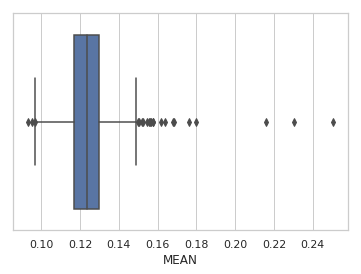

In [31]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=compare_datas_my_capture['MEAN'])

In [32]:
malware_path = '/home/sdsra/Downloads/CTU-13-Dataset/malware'
malware_dir_list = os.listdir(malware_path)
malware_datas = pd.DataFrame()
for malware_dir in malware_dir_list:
    trgt_malware_dir = malware_path + '/' + malware_dir
    if os.path.isfile(trgt_malware_dir + '/datas.pkl'):
        datas = pd.read_pickle(trgt_malware_dir + '/datas.pkl')
        malware_datas = pd.concat([malware_datas, datas], ignore_index=True)

In [34]:
xScaled_malware = minMaxScaler.fit_transform(malware_datas.select_dtypes(include=[np.number]))
X_malware = pd.DataFrame(xScaled_malware)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
X_pred_malware = trainedAutoencoder.predict(X_malware)

In [36]:
DX_malware = (X_malware - X_pred_malware) ** 2

In [37]:
compare_datas_malware = malware_datas.copy()

In [38]:
compare_datas_malware['SUM'] = np.sum(DX_malware, axis=1)

In [39]:
compare_datas_malware['MEAN'] = np.mean(DX_malware, axis=1)

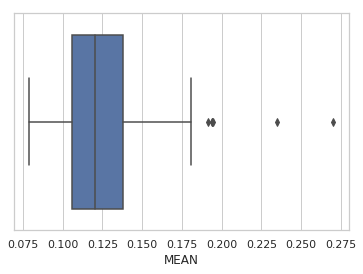

In [40]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=compare_datas_malware['MEAN'])